In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import nbinom
import time
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math
import copy
import scipy
import pickle

from scipy.stats import poisson

In [2]:
# Across all Fig 2 plots
sigmas = np.arange(0,0.99, 0.01)
betas = np.arange(0.5,6.01, 0.02)
emr_max = 0.25298850574712645

# Fig 3 (comparative)

In [3]:
def get_em_rate_fig3(mu=1e-4, beta=1, gamma=0.5, R=0.99, sigma=0.4, sigma21=0.0):
    I=1-R
    poisson_mu = beta*(1-sigma21)*R/gamma

    # Pure Poisson offspring distribution:
    # z = np.arange(poisson.ppf(0.0001, poisson_mu), poisson.ppf(0.9999, poisson_mu))
    #Pz = poisson.pmf(z, poisson_mu)
    #d = get_extinction_prob_from_zdist(Pz)
    
    # Offspring distribution taking exponential recovery time into account:
    #Pz = 1/poisson_mu
    d = 1/poisson_mu


    em_rate = I * mu * beta * R * (1-sigma) * (1-d)
    #print("Emergence rate:", em_rate)

    return em_rate

def get_em_rate_at_equi_fig3(mu=1e-4, beta=1, gamma=0.5, sigma=0.4, sigma21=0):
    R = gamma/(beta * (1-sigma))
    if R > 1:
        R = 1
    er = get_em_rate_fig3(mu=mu, beta=beta, gamma=gamma, R=R, sigma=sigma, sigma21=sigma21)
    return er

In [4]:
# Fig 3A

In [5]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)
i=0
for s in sigmas:
    for b in betas:
        em_rates.append(get_em_rate_at_equi_fig3(beta=b, sigma=s, mu=1, sigma21=0.0))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 27324
1 out of 27324
2 out of 27324
3 out of 27324
4 out of 27324
5 out of 27324
6 out of 27324
7 out of 27324
8 out of 27324
9 out of 27324
10 out of 27324
11 out of 27324
12 out of 27324
13 out of 27324
14 out of 27324
15 out of 27324
16 out of 27324
17 out of 27324
18 out of 27324
19 out of 27324
20 out of 27324
21 out of 27324
22 out of 27324
23 out of 27324
24 out of 27324
25 out of 27324
26 out of 27324
27 out of 27324
28 out of 27324
29 out of 27324
30 out of 27324
31 out of 27324
32 out of 27324
33 out of 27324
34 out of 27324
35 out of 27324
36 out of 27324
37 out of 27324
38 out of 27324
39 out of 27324
40 out of 27324
41 out of 27324
42 out of 27324
43 out of 27324
44 out of 27324
45 out of 27324
46 out of 27324
47 out of 27324
48 out of 27324
49 out of 27324
50 out of 27324
51 out of 27324
52 out of 27324
53 out of 27324
54 out of 27324
55 out of 27324
56 out of 27324
57 out of 27324
58 out of 27324
59 out of 27324
60 out of 27324
61 out of 27324
62 out of 27324
63

2186 out of 27324
2187 out of 27324
2188 out of 27324
2189 out of 27324
2190 out of 27324
2191 out of 27324
2192 out of 27324
2193 out of 27324
2194 out of 27324
2195 out of 27324
2196 out of 27324
2197 out of 27324
2198 out of 27324
2199 out of 27324
2200 out of 27324
2201 out of 27324
2202 out of 27324
2203 out of 27324
2204 out of 27324
2205 out of 27324
2206 out of 27324
2207 out of 27324
2208 out of 27324
2209 out of 27324
2210 out of 27324
2211 out of 27324
2212 out of 27324
2213 out of 27324
2214 out of 27324
2215 out of 27324
2216 out of 27324
2217 out of 27324
2218 out of 27324
2219 out of 27324
2220 out of 27324
2221 out of 27324
2222 out of 27324
2223 out of 27324
2224 out of 27324
2225 out of 27324
2226 out of 27324
2227 out of 27324
2228 out of 27324
2229 out of 27324
2230 out of 27324
2231 out of 27324
2232 out of 27324
2233 out of 27324
2234 out of 27324
2235 out of 27324
2236 out of 27324
2237 out of 27324
2238 out of 27324
2239 out of 27324
2240 out of 27324
2241 out o

4185 out of 27324
4186 out of 27324
4187 out of 27324
4188 out of 27324
4189 out of 27324
4190 out of 27324
4191 out of 27324
4192 out of 27324
4193 out of 27324
4194 out of 27324
4195 out of 27324
4196 out of 27324
4197 out of 27324
4198 out of 27324
4199 out of 27324
4200 out of 27324
4201 out of 27324
4202 out of 27324
4203 out of 27324
4204 out of 27324
4205 out of 27324
4206 out of 27324
4207 out of 27324
4208 out of 27324
4209 out of 27324
4210 out of 27324
4211 out of 27324
4212 out of 27324
4213 out of 27324
4214 out of 27324
4215 out of 27324
4216 out of 27324
4217 out of 27324
4218 out of 27324
4219 out of 27324
4220 out of 27324
4221 out of 27324
4222 out of 27324
4223 out of 27324
4224 out of 27324
4225 out of 27324
4226 out of 27324
4227 out of 27324
4228 out of 27324
4229 out of 27324
4230 out of 27324
4231 out of 27324
4232 out of 27324
4233 out of 27324
4234 out of 27324
4235 out of 27324
4236 out of 27324
4237 out of 27324
4238 out of 27324
4239 out of 27324
4240 out o

5246 out of 27324
5247 out of 27324
5248 out of 27324
5249 out of 27324
5250 out of 27324
5251 out of 27324
5252 out of 27324
5253 out of 27324
5254 out of 27324
5255 out of 27324
5256 out of 27324
5257 out of 27324
5258 out of 27324
5259 out of 27324
5260 out of 27324
5261 out of 27324
5262 out of 27324
5263 out of 27324
5264 out of 27324
5265 out of 27324
5266 out of 27324
5267 out of 27324
5268 out of 27324
5269 out of 27324
5270 out of 27324
5271 out of 27324
5272 out of 27324
5273 out of 27324
5274 out of 27324
5275 out of 27324
5276 out of 27324
5277 out of 27324
5278 out of 27324
5279 out of 27324
5280 out of 27324
5281 out of 27324
5282 out of 27324
5283 out of 27324
5284 out of 27324
5285 out of 27324
5286 out of 27324
5287 out of 27324
5288 out of 27324
5289 out of 27324
5290 out of 27324
5291 out of 27324
5292 out of 27324
5293 out of 27324
5294 out of 27324
5295 out of 27324
5296 out of 27324
5297 out of 27324
5298 out of 27324
5299 out of 27324
5300 out of 27324
5301 out o

6442 out of 27324
6443 out of 27324
6444 out of 27324
6445 out of 27324
6446 out of 27324
6447 out of 27324
6448 out of 27324
6449 out of 27324
6450 out of 27324
6451 out of 27324
6452 out of 27324
6453 out of 27324
6454 out of 27324
6455 out of 27324
6456 out of 27324
6457 out of 27324
6458 out of 27324
6459 out of 27324
6460 out of 27324
6461 out of 27324
6462 out of 27324
6463 out of 27324
6464 out of 27324
6465 out of 27324
6466 out of 27324
6467 out of 27324
6468 out of 27324
6469 out of 27324
6470 out of 27324
6471 out of 27324
6472 out of 27324
6473 out of 27324
6474 out of 27324
6475 out of 27324
6476 out of 27324
6477 out of 27324
6478 out of 27324
6479 out of 27324
6480 out of 27324
6481 out of 27324
6482 out of 27324
6483 out of 27324
6484 out of 27324
6485 out of 27324
6486 out of 27324
6487 out of 27324
6488 out of 27324
6489 out of 27324
6490 out of 27324
6491 out of 27324
6492 out of 27324
6493 out of 27324
6494 out of 27324
6495 out of 27324
6496 out of 27324
6497 out o

7489 out of 27324
7490 out of 27324
7491 out of 27324
7492 out of 27324
7493 out of 27324
7494 out of 27324
7495 out of 27324
7496 out of 27324
7497 out of 27324
7498 out of 27324
7499 out of 27324
7500 out of 27324
7501 out of 27324
7502 out of 27324
7503 out of 27324
7504 out of 27324
7505 out of 27324
7506 out of 27324
7507 out of 27324
7508 out of 27324
7509 out of 27324
7510 out of 27324
7511 out of 27324
7512 out of 27324
7513 out of 27324
7514 out of 27324
7515 out of 27324
7516 out of 27324
7517 out of 27324
7518 out of 27324
7519 out of 27324
7520 out of 27324
7521 out of 27324
7522 out of 27324
7523 out of 27324
7524 out of 27324
7525 out of 27324
7526 out of 27324
7527 out of 27324
7528 out of 27324
7529 out of 27324
7530 out of 27324
7531 out of 27324
7532 out of 27324
7533 out of 27324
7534 out of 27324
7535 out of 27324
7536 out of 27324
7537 out of 27324
7538 out of 27324
7539 out of 27324
7540 out of 27324
7541 out of 27324
7542 out of 27324
7543 out of 27324
7544 out o

8556 out of 27324
8557 out of 27324
8558 out of 27324
8559 out of 27324
8560 out of 27324
8561 out of 27324
8562 out of 27324
8563 out of 27324
8564 out of 27324
8565 out of 27324
8566 out of 27324
8567 out of 27324
8568 out of 27324
8569 out of 27324
8570 out of 27324
8571 out of 27324
8572 out of 27324
8573 out of 27324
8574 out of 27324
8575 out of 27324
8576 out of 27324
8577 out of 27324
8578 out of 27324
8579 out of 27324
8580 out of 27324
8581 out of 27324
8582 out of 27324
8583 out of 27324
8584 out of 27324
8585 out of 27324
8586 out of 27324
8587 out of 27324
8588 out of 27324
8589 out of 27324
8590 out of 27324
8591 out of 27324
8592 out of 27324
8593 out of 27324
8594 out of 27324
8595 out of 27324
8596 out of 27324
8597 out of 27324
8598 out of 27324
8599 out of 27324
8600 out of 27324
8601 out of 27324
8602 out of 27324
8603 out of 27324
8604 out of 27324
8605 out of 27324
8606 out of 27324
8607 out of 27324
8608 out of 27324
8609 out of 27324
8610 out of 27324
8611 out o

9624 out of 27324
9625 out of 27324
9626 out of 27324
9627 out of 27324
9628 out of 27324
9629 out of 27324
9630 out of 27324
9631 out of 27324
9632 out of 27324
9633 out of 27324
9634 out of 27324
9635 out of 27324
9636 out of 27324
9637 out of 27324
9638 out of 27324
9639 out of 27324
9640 out of 27324
9641 out of 27324
9642 out of 27324
9643 out of 27324
9644 out of 27324
9645 out of 27324
9646 out of 27324
9647 out of 27324
9648 out of 27324
9649 out of 27324
9650 out of 27324
9651 out of 27324
9652 out of 27324
9653 out of 27324
9654 out of 27324
9655 out of 27324
9656 out of 27324
9657 out of 27324
9658 out of 27324
9659 out of 27324
9660 out of 27324
9661 out of 27324
9662 out of 27324
9663 out of 27324
9664 out of 27324
9665 out of 27324
9666 out of 27324
9667 out of 27324
9668 out of 27324
9669 out of 27324
9670 out of 27324
9671 out of 27324
9672 out of 27324
9673 out of 27324
9674 out of 27324
9675 out of 27324
9676 out of 27324
9677 out of 27324
9678 out of 27324
9679 out o

10682 out of 27324
10683 out of 27324
10684 out of 27324
10685 out of 27324
10686 out of 27324
10687 out of 27324
10688 out of 27324
10689 out of 27324
10690 out of 27324
10691 out of 27324
10692 out of 27324
10693 out of 27324
10694 out of 27324
10695 out of 27324
10696 out of 27324
10697 out of 27324
10698 out of 27324
10699 out of 27324
10700 out of 27324
10701 out of 27324
10702 out of 27324
10703 out of 27324
10704 out of 27324
10705 out of 27324
10706 out of 27324
10707 out of 27324
10708 out of 27324
10709 out of 27324
10710 out of 27324
10711 out of 27324
10712 out of 27324
10713 out of 27324
10714 out of 27324
10715 out of 27324
10716 out of 27324
10717 out of 27324
10718 out of 27324
10719 out of 27324
10720 out of 27324
10721 out of 27324
10722 out of 27324
10723 out of 27324
10724 out of 27324
10725 out of 27324
10726 out of 27324
10727 out of 27324
10728 out of 27324
10729 out of 27324
10730 out of 27324
10731 out of 27324
10732 out of 27324
10733 out of 27324
10734 out of

11746 out of 27324
11747 out of 27324
11748 out of 27324
11749 out of 27324
11750 out of 27324
11751 out of 27324
11752 out of 27324
11753 out of 27324
11754 out of 27324
11755 out of 27324
11756 out of 27324
11757 out of 27324
11758 out of 27324
11759 out of 27324
11760 out of 27324
11761 out of 27324
11762 out of 27324
11763 out of 27324
11764 out of 27324
11765 out of 27324
11766 out of 27324
11767 out of 27324
11768 out of 27324
11769 out of 27324
11770 out of 27324
11771 out of 27324
11772 out of 27324
11773 out of 27324
11774 out of 27324
11775 out of 27324
11776 out of 27324
11777 out of 27324
11778 out of 27324
11779 out of 27324
11780 out of 27324
11781 out of 27324
11782 out of 27324
11783 out of 27324
11784 out of 27324
11785 out of 27324
11786 out of 27324
11787 out of 27324
11788 out of 27324
11789 out of 27324
11790 out of 27324
11791 out of 27324
11792 out of 27324
11793 out of 27324
11794 out of 27324
11795 out of 27324
11796 out of 27324
11797 out of 27324
11798 out of

12827 out of 27324
12828 out of 27324
12829 out of 27324
12830 out of 27324
12831 out of 27324
12832 out of 27324
12833 out of 27324
12834 out of 27324
12835 out of 27324
12836 out of 27324
12837 out of 27324
12838 out of 27324
12839 out of 27324
12840 out of 27324
12841 out of 27324
12842 out of 27324
12843 out of 27324
12844 out of 27324
12845 out of 27324
12846 out of 27324
12847 out of 27324
12848 out of 27324
12849 out of 27324
12850 out of 27324
12851 out of 27324
12852 out of 27324
12853 out of 27324
12854 out of 27324
12855 out of 27324
12856 out of 27324
12857 out of 27324
12858 out of 27324
12859 out of 27324
12860 out of 27324
12861 out of 27324
12862 out of 27324
12863 out of 27324
12864 out of 27324
12865 out of 27324
12866 out of 27324
12867 out of 27324
12868 out of 27324
12869 out of 27324
12870 out of 27324
12871 out of 27324
12872 out of 27324
12873 out of 27324
12874 out of 27324
12875 out of 27324
12876 out of 27324
12877 out of 27324
12878 out of 27324
12879 out of

13887 out of 27324
13888 out of 27324
13889 out of 27324
13890 out of 27324
13891 out of 27324
13892 out of 27324
13893 out of 27324
13894 out of 27324
13895 out of 27324
13896 out of 27324
13897 out of 27324
13898 out of 27324
13899 out of 27324
13900 out of 27324
13901 out of 27324
13902 out of 27324
13903 out of 27324
13904 out of 27324
13905 out of 27324
13906 out of 27324
13907 out of 27324
13908 out of 27324
13909 out of 27324
13910 out of 27324
13911 out of 27324
13912 out of 27324
13913 out of 27324
13914 out of 27324
13915 out of 27324
13916 out of 27324
13917 out of 27324
13918 out of 27324
13919 out of 27324
13920 out of 27324
13921 out of 27324
13922 out of 27324
13923 out of 27324
13924 out of 27324
13925 out of 27324
13926 out of 27324
13927 out of 27324
13928 out of 27324
13929 out of 27324
13930 out of 27324
13931 out of 27324
13932 out of 27324
13933 out of 27324
13934 out of 27324
13935 out of 27324
13936 out of 27324
13937 out of 27324
13938 out of 27324
13939 out of

14946 out of 27324
14947 out of 27324
14948 out of 27324
14949 out of 27324
14950 out of 27324
14951 out of 27324
14952 out of 27324
14953 out of 27324
14954 out of 27324
14955 out of 27324
14956 out of 27324
14957 out of 27324
14958 out of 27324
14959 out of 27324
14960 out of 27324
14961 out of 27324
14962 out of 27324
14963 out of 27324
14964 out of 27324
14965 out of 27324
14966 out of 27324
14967 out of 27324
14968 out of 27324
14969 out of 27324
14970 out of 27324
14971 out of 27324
14972 out of 27324
14973 out of 27324
14974 out of 27324
14975 out of 27324
14976 out of 27324
14977 out of 27324
14978 out of 27324
14979 out of 27324
14980 out of 27324
14981 out of 27324
14982 out of 27324
14983 out of 27324
14984 out of 27324
14985 out of 27324
14986 out of 27324
14987 out of 27324
14988 out of 27324
14989 out of 27324
14990 out of 27324
14991 out of 27324
14992 out of 27324
14993 out of 27324
14994 out of 27324
14995 out of 27324
14996 out of 27324
14997 out of 27324
14998 out of

16020 out of 27324
16021 out of 27324
16022 out of 27324
16023 out of 27324
16024 out of 27324
16025 out of 27324
16026 out of 27324
16027 out of 27324
16028 out of 27324
16029 out of 27324
16030 out of 27324
16031 out of 27324
16032 out of 27324
16033 out of 27324
16034 out of 27324
16035 out of 27324
16036 out of 27324
16037 out of 27324
16038 out of 27324
16039 out of 27324
16040 out of 27324
16041 out of 27324
16042 out of 27324
16043 out of 27324
16044 out of 27324
16045 out of 27324
16046 out of 27324
16047 out of 27324
16048 out of 27324
16049 out of 27324
16050 out of 27324
16051 out of 27324
16052 out of 27324
16053 out of 27324
16054 out of 27324
16055 out of 27324
16056 out of 27324
16057 out of 27324
16058 out of 27324
16059 out of 27324
16060 out of 27324
16061 out of 27324
16062 out of 27324
16063 out of 27324
16064 out of 27324
16065 out of 27324
16066 out of 27324
16067 out of 27324
16068 out of 27324
16069 out of 27324
16070 out of 27324
16071 out of 27324
16072 out of

17084 out of 27324
17085 out of 27324
17086 out of 27324
17087 out of 27324
17088 out of 27324
17089 out of 27324
17090 out of 27324
17091 out of 27324
17092 out of 27324
17093 out of 27324
17094 out of 27324
17095 out of 27324
17096 out of 27324
17097 out of 27324
17098 out of 27324
17099 out of 27324
17100 out of 27324
17101 out of 27324
17102 out of 27324
17103 out of 27324
17104 out of 27324
17105 out of 27324
17106 out of 27324
17107 out of 27324
17108 out of 27324
17109 out of 27324
17110 out of 27324
17111 out of 27324
17112 out of 27324
17113 out of 27324
17114 out of 27324
17115 out of 27324
17116 out of 27324
17117 out of 27324
17118 out of 27324
17119 out of 27324
17120 out of 27324
17121 out of 27324
17122 out of 27324
17123 out of 27324
17124 out of 27324
17125 out of 27324
17126 out of 27324
17127 out of 27324
17128 out of 27324
17129 out of 27324
17130 out of 27324
17131 out of 27324
17132 out of 27324
17133 out of 27324
17134 out of 27324
17135 out of 27324
17136 out of

18154 out of 27324
18155 out of 27324
18156 out of 27324
18157 out of 27324
18158 out of 27324
18159 out of 27324
18160 out of 27324
18161 out of 27324
18162 out of 27324
18163 out of 27324
18164 out of 27324
18165 out of 27324
18166 out of 27324
18167 out of 27324
18168 out of 27324
18169 out of 27324
18170 out of 27324
18171 out of 27324
18172 out of 27324
18173 out of 27324
18174 out of 27324
18175 out of 27324
18176 out of 27324
18177 out of 27324
18178 out of 27324
18179 out of 27324
18180 out of 27324
18181 out of 27324
18182 out of 27324
18183 out of 27324
18184 out of 27324
18185 out of 27324
18186 out of 27324
18187 out of 27324
18188 out of 27324
18189 out of 27324
18190 out of 27324
18191 out of 27324
18192 out of 27324
18193 out of 27324
18194 out of 27324
18195 out of 27324
18196 out of 27324
18197 out of 27324
18198 out of 27324
18199 out of 27324
18200 out of 27324
18201 out of 27324
18202 out of 27324
18203 out of 27324
18204 out of 27324
18205 out of 27324
18206 out of

19225 out of 27324
19226 out of 27324
19227 out of 27324
19228 out of 27324
19229 out of 27324
19230 out of 27324
19231 out of 27324
19232 out of 27324
19233 out of 27324
19234 out of 27324
19235 out of 27324
19236 out of 27324
19237 out of 27324
19238 out of 27324
19239 out of 27324
19240 out of 27324
19241 out of 27324
19242 out of 27324
19243 out of 27324
19244 out of 27324
19245 out of 27324
19246 out of 27324
19247 out of 27324
19248 out of 27324
19249 out of 27324
19250 out of 27324
19251 out of 27324
19252 out of 27324
19253 out of 27324
19254 out of 27324
19255 out of 27324
19256 out of 27324
19257 out of 27324
19258 out of 27324
19259 out of 27324
19260 out of 27324
19261 out of 27324
19262 out of 27324
19263 out of 27324
19264 out of 27324
19265 out of 27324
19266 out of 27324
19267 out of 27324
19268 out of 27324
19269 out of 27324
19270 out of 27324
19271 out of 27324
19272 out of 27324
19273 out of 27324
19274 out of 27324
19275 out of 27324
19276 out of 27324
19277 out of

20292 out of 27324
20293 out of 27324
20294 out of 27324
20295 out of 27324
20296 out of 27324
20297 out of 27324
20298 out of 27324
20299 out of 27324
20300 out of 27324
20301 out of 27324
20302 out of 27324
20303 out of 27324
20304 out of 27324
20305 out of 27324
20306 out of 27324
20307 out of 27324
20308 out of 27324
20309 out of 27324
20310 out of 27324
20311 out of 27324
20312 out of 27324
20313 out of 27324
20314 out of 27324
20315 out of 27324
20316 out of 27324
20317 out of 27324
20318 out of 27324
20319 out of 27324
20320 out of 27324
20321 out of 27324
20322 out of 27324
20323 out of 27324
20324 out of 27324
20325 out of 27324
20326 out of 27324
20327 out of 27324
20328 out of 27324
20329 out of 27324
20330 out of 27324
20331 out of 27324
20332 out of 27324
20333 out of 27324
20334 out of 27324
20335 out of 27324
20336 out of 27324
20337 out of 27324
20338 out of 27324
20339 out of 27324
20340 out of 27324
20341 out of 27324
20342 out of 27324
20343 out of 27324
20344 out of

21360 out of 27324
21361 out of 27324
21362 out of 27324
21363 out of 27324
21364 out of 27324
21365 out of 27324
21366 out of 27324
21367 out of 27324
21368 out of 27324
21369 out of 27324
21370 out of 27324
21371 out of 27324
21372 out of 27324
21373 out of 27324
21374 out of 27324
21375 out of 27324
21376 out of 27324
21377 out of 27324
21378 out of 27324
21379 out of 27324
21380 out of 27324
21381 out of 27324
21382 out of 27324
21383 out of 27324
21384 out of 27324
21385 out of 27324
21386 out of 27324
21387 out of 27324
21388 out of 27324
21389 out of 27324
21390 out of 27324
21391 out of 27324
21392 out of 27324
21393 out of 27324
21394 out of 27324
21395 out of 27324
21396 out of 27324
21397 out of 27324
21398 out of 27324
21399 out of 27324
21400 out of 27324
21401 out of 27324
21402 out of 27324
21403 out of 27324
21404 out of 27324
21405 out of 27324
21406 out of 27324
21407 out of 27324
21408 out of 27324
21409 out of 27324
21410 out of 27324
21411 out of 27324
21412 out of

22446 out of 27324
22447 out of 27324
22448 out of 27324
22449 out of 27324
22450 out of 27324
22451 out of 27324
22452 out of 27324
22453 out of 27324
22454 out of 27324
22455 out of 27324
22456 out of 27324
22457 out of 27324
22458 out of 27324
22459 out of 27324
22460 out of 27324
22461 out of 27324
22462 out of 27324
22463 out of 27324
22464 out of 27324
22465 out of 27324
22466 out of 27324
22467 out of 27324
22468 out of 27324
22469 out of 27324
22470 out of 27324
22471 out of 27324
22472 out of 27324
22473 out of 27324
22474 out of 27324
22475 out of 27324
22476 out of 27324
22477 out of 27324
22478 out of 27324
22479 out of 27324
22480 out of 27324
22481 out of 27324
22482 out of 27324
22483 out of 27324
22484 out of 27324
22485 out of 27324
22486 out of 27324
22487 out of 27324
22488 out of 27324
22489 out of 27324
22490 out of 27324
22491 out of 27324
22492 out of 27324
22493 out of 27324
22494 out of 27324
22495 out of 27324
22496 out of 27324
22497 out of 27324
22498 out of

23417 out of 27324
23418 out of 27324
23419 out of 27324
23420 out of 27324
23421 out of 27324
23422 out of 27324
23423 out of 27324
23424 out of 27324
23425 out of 27324
23426 out of 27324
23427 out of 27324
23428 out of 27324
23429 out of 27324
23430 out of 27324
23431 out of 27324
23432 out of 27324
23433 out of 27324
23434 out of 27324
23435 out of 27324
23436 out of 27324
23437 out of 27324
23438 out of 27324
23439 out of 27324
23440 out of 27324
23441 out of 27324
23442 out of 27324
23443 out of 27324
23444 out of 27324
23445 out of 27324
23446 out of 27324
23447 out of 27324
23448 out of 27324
23449 out of 27324
23450 out of 27324
23451 out of 27324
23452 out of 27324
23453 out of 27324
23454 out of 27324
23455 out of 27324
23456 out of 27324
23457 out of 27324
23458 out of 27324
23459 out of 27324
23460 out of 27324
23461 out of 27324
23462 out of 27324
23463 out of 27324
23464 out of 27324
23465 out of 27324
23466 out of 27324
23467 out of 27324
23468 out of 27324
23469 out of

24479 out of 27324
24480 out of 27324
24481 out of 27324
24482 out of 27324
24483 out of 27324
24484 out of 27324
24485 out of 27324
24486 out of 27324
24487 out of 27324
24488 out of 27324
24489 out of 27324
24490 out of 27324
24491 out of 27324
24492 out of 27324
24493 out of 27324
24494 out of 27324
24495 out of 27324
24496 out of 27324
24497 out of 27324
24498 out of 27324
24499 out of 27324
24500 out of 27324
24501 out of 27324
24502 out of 27324
24503 out of 27324
24504 out of 27324
24505 out of 27324
24506 out of 27324
24507 out of 27324
24508 out of 27324
24509 out of 27324
24510 out of 27324
24511 out of 27324
24512 out of 27324
24513 out of 27324
24514 out of 27324
24515 out of 27324
24516 out of 27324
24517 out of 27324
24518 out of 27324
24519 out of 27324
24520 out of 27324
24521 out of 27324
24522 out of 27324
24523 out of 27324
24524 out of 27324
24525 out of 27324
24526 out of 27324
24527 out of 27324
24528 out of 27324
24529 out of 27324
24530 out of 27324
24531 out of

25530 out of 27324
25531 out of 27324
25532 out of 27324
25533 out of 27324
25534 out of 27324
25535 out of 27324
25536 out of 27324
25537 out of 27324
25538 out of 27324
25539 out of 27324
25540 out of 27324
25541 out of 27324
25542 out of 27324
25543 out of 27324
25544 out of 27324
25545 out of 27324
25546 out of 27324
25547 out of 27324
25548 out of 27324
25549 out of 27324
25550 out of 27324
25551 out of 27324
25552 out of 27324
25553 out of 27324
25554 out of 27324
25555 out of 27324
25556 out of 27324
25557 out of 27324
25558 out of 27324
25559 out of 27324
25560 out of 27324
25561 out of 27324
25562 out of 27324
25563 out of 27324
25564 out of 27324
25565 out of 27324
25566 out of 27324
25567 out of 27324
25568 out of 27324
25569 out of 27324
25570 out of 27324
25571 out of 27324
25572 out of 27324
25573 out of 27324
25574 out of 27324
25575 out of 27324
25576 out of 27324
25577 out of 27324
25578 out of 27324
25579 out of 27324
25580 out of 27324
25581 out of 27324
25582 out of

26577 out of 27324
26578 out of 27324
26579 out of 27324
26580 out of 27324
26581 out of 27324
26582 out of 27324
26583 out of 27324
26584 out of 27324
26585 out of 27324
26586 out of 27324
26587 out of 27324
26588 out of 27324
26589 out of 27324
26590 out of 27324
26591 out of 27324
26592 out of 27324
26593 out of 27324
26594 out of 27324
26595 out of 27324
26596 out of 27324
26597 out of 27324
26598 out of 27324
26599 out of 27324
26600 out of 27324
26601 out of 27324
26602 out of 27324
26603 out of 27324
26604 out of 27324
26605 out of 27324
26606 out of 27324
26607 out of 27324
26608 out of 27324
26609 out of 27324
26610 out of 27324
26611 out of 27324
26612 out of 27324
26613 out of 27324
26614 out of 27324
26615 out of 27324
26616 out of 27324
26617 out of 27324
26618 out of 27324
26619 out of 27324
26620 out of 27324
26621 out of 27324
26622 out of 27324
26623 out of 27324
26624 out of 27324
26625 out of 27324
26626 out of 27324
26627 out of 27324
26628 out of 27324
26629 out of

1/T between -1.0141829705918385e-16 and 0.25298850574712645


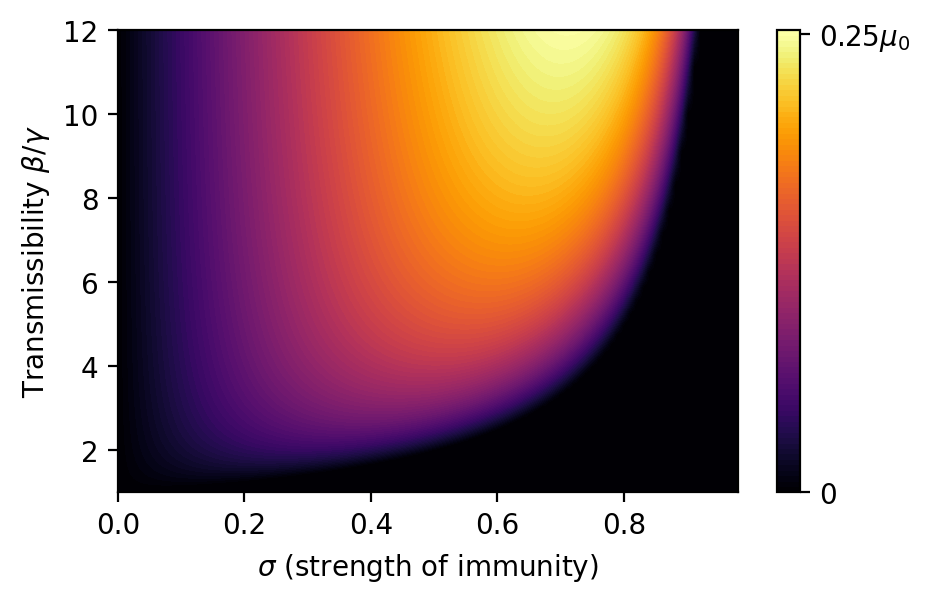

In [6]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)
from scipy.interpolate import griddata
R0s = bs_out * 2
# Create grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured data
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, fiducially.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
#plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno', extend='min')
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, 0.00701, 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, np.max(1/Ts), 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=[])

cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu_0$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
#plt.title('Net adaptation rate (leaky immunity)')
plt.show()

In [7]:
# Fig 3B

In [8]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)
i=0
for s in sigmas:
    for b in betas:
        em_rates.append(get_em_rate_at_equi_fig3(beta=b, sigma=s, mu=0.6, sigma21=0.0))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 27324
1 out of 27324
2 out of 27324
3 out of 27324
4 out of 27324
5 out of 27324
6 out of 27324
7 out of 27324
8 out of 27324
9 out of 27324
10 out of 27324
11 out of 27324
12 out of 27324
13 out of 27324
14 out of 27324
15 out of 27324
16 out of 27324
17 out of 27324
18 out of 27324
19 out of 27324
20 out of 27324
21 out of 27324
22 out of 27324
23 out of 27324
24 out of 27324
25 out of 27324
26 out of 27324
27 out of 27324
28 out of 27324
29 out of 27324
30 out of 27324
31 out of 27324
32 out of 27324
33 out of 27324
34 out of 27324
35 out of 27324
36 out of 27324
37 out of 27324
38 out of 27324
39 out of 27324
40 out of 27324
41 out of 27324
42 out of 27324
43 out of 27324
44 out of 27324
45 out of 27324
46 out of 27324
47 out of 27324
48 out of 27324
49 out of 27324
50 out of 27324
51 out of 27324
52 out of 27324
53 out of 27324
54 out of 27324
55 out of 27324
56 out of 27324
57 out of 27324
58 out of 27324
59 out of 27324
60 out of 27324
61 out of 27324
62 out of 27324
63

2059 out of 27324
2060 out of 27324
2061 out of 27324
2062 out of 27324
2063 out of 27324
2064 out of 27324
2065 out of 27324
2066 out of 27324
2067 out of 27324
2068 out of 27324
2069 out of 27324
2070 out of 27324
2071 out of 27324
2072 out of 27324
2073 out of 27324
2074 out of 27324
2075 out of 27324
2076 out of 27324
2077 out of 27324
2078 out of 27324
2079 out of 27324
2080 out of 27324
2081 out of 27324
2082 out of 27324
2083 out of 27324
2084 out of 27324
2085 out of 27324
2086 out of 27324
2087 out of 27324
2088 out of 27324
2089 out of 27324
2090 out of 27324
2091 out of 27324
2092 out of 27324
2093 out of 27324
2094 out of 27324
2095 out of 27324
2096 out of 27324
2097 out of 27324
2098 out of 27324
2099 out of 27324
2100 out of 27324
2101 out of 27324
2102 out of 27324
2103 out of 27324
2104 out of 27324
2105 out of 27324
2106 out of 27324
2107 out of 27324
2108 out of 27324
2109 out of 27324
2110 out of 27324
2111 out of 27324
2112 out of 27324
2113 out of 27324
2114 out o

3069 out of 27324
3070 out of 27324
3071 out of 27324
3072 out of 27324
3073 out of 27324
3074 out of 27324
3075 out of 27324
3076 out of 27324
3077 out of 27324
3078 out of 27324
3079 out of 27324
3080 out of 27324
3081 out of 27324
3082 out of 27324
3083 out of 27324
3084 out of 27324
3085 out of 27324
3086 out of 27324
3087 out of 27324
3088 out of 27324
3089 out of 27324
3090 out of 27324
3091 out of 27324
3092 out of 27324
3093 out of 27324
3094 out of 27324
3095 out of 27324
3096 out of 27324
3097 out of 27324
3098 out of 27324
3099 out of 27324
3100 out of 27324
3101 out of 27324
3102 out of 27324
3103 out of 27324
3104 out of 27324
3105 out of 27324
3106 out of 27324
3107 out of 27324
3108 out of 27324
3109 out of 27324
3110 out of 27324
3111 out of 27324
3112 out of 27324
3113 out of 27324
3114 out of 27324
3115 out of 27324
3116 out of 27324
3117 out of 27324
3118 out of 27324
3119 out of 27324
3120 out of 27324
3121 out of 27324
3122 out of 27324
3123 out of 27324
3124 out o

4126 out of 27324
4127 out of 27324
4128 out of 27324
4129 out of 27324
4130 out of 27324
4131 out of 27324
4132 out of 27324
4133 out of 27324
4134 out of 27324
4135 out of 27324
4136 out of 27324
4137 out of 27324
4138 out of 27324
4139 out of 27324
4140 out of 27324
4141 out of 27324
4142 out of 27324
4143 out of 27324
4144 out of 27324
4145 out of 27324
4146 out of 27324
4147 out of 27324
4148 out of 27324
4149 out of 27324
4150 out of 27324
4151 out of 27324
4152 out of 27324
4153 out of 27324
4154 out of 27324
4155 out of 27324
4156 out of 27324
4157 out of 27324
4158 out of 27324
4159 out of 27324
4160 out of 27324
4161 out of 27324
4162 out of 27324
4163 out of 27324
4164 out of 27324
4165 out of 27324
4166 out of 27324
4167 out of 27324
4168 out of 27324
4169 out of 27324
4170 out of 27324
4171 out of 27324
4172 out of 27324
4173 out of 27324
4174 out of 27324
4175 out of 27324
4176 out of 27324
4177 out of 27324
4178 out of 27324
4179 out of 27324
4180 out of 27324
4181 out o

5191 out of 27324
5192 out of 27324
5193 out of 27324
5194 out of 27324
5195 out of 27324
5196 out of 27324
5197 out of 27324
5198 out of 27324
5199 out of 27324
5200 out of 27324
5201 out of 27324
5202 out of 27324
5203 out of 27324
5204 out of 27324
5205 out of 27324
5206 out of 27324
5207 out of 27324
5208 out of 27324
5209 out of 27324
5210 out of 27324
5211 out of 27324
5212 out of 27324
5213 out of 27324
5214 out of 27324
5215 out of 27324
5216 out of 27324
5217 out of 27324
5218 out of 27324
5219 out of 27324
5220 out of 27324
5221 out of 27324
5222 out of 27324
5223 out of 27324
5224 out of 27324
5225 out of 27324
5226 out of 27324
5227 out of 27324
5228 out of 27324
5229 out of 27324
5230 out of 27324
5231 out of 27324
5232 out of 27324
5233 out of 27324
5234 out of 27324
5235 out of 27324
5236 out of 27324
5237 out of 27324
5238 out of 27324
5239 out of 27324
5240 out of 27324
5241 out of 27324
5242 out of 27324
5243 out of 27324
5244 out of 27324
5245 out of 27324
5246 out o

6249 out of 27324
6250 out of 27324
6251 out of 27324
6252 out of 27324
6253 out of 27324
6254 out of 27324
6255 out of 27324
6256 out of 27324
6257 out of 27324
6258 out of 27324
6259 out of 27324
6260 out of 27324
6261 out of 27324
6262 out of 27324
6263 out of 27324
6264 out of 27324
6265 out of 27324
6266 out of 27324
6267 out of 27324
6268 out of 27324
6269 out of 27324
6270 out of 27324
6271 out of 27324
6272 out of 27324
6273 out of 27324
6274 out of 27324
6275 out of 27324
6276 out of 27324
6277 out of 27324
6278 out of 27324
6279 out of 27324
6280 out of 27324
6281 out of 27324
6282 out of 27324
6283 out of 27324
6284 out of 27324
6285 out of 27324
6286 out of 27324
6287 out of 27324
6288 out of 27324
6289 out of 27324
6290 out of 27324
6291 out of 27324
6292 out of 27324
6293 out of 27324
6294 out of 27324
6295 out of 27324
6296 out of 27324
6297 out of 27324
6298 out of 27324
6299 out of 27324
6300 out of 27324
6301 out of 27324
6302 out of 27324
6303 out of 27324
6304 out o

7328 out of 27324
7329 out of 27324
7330 out of 27324
7331 out of 27324
7332 out of 27324
7333 out of 27324
7334 out of 27324
7335 out of 27324
7336 out of 27324
7337 out of 27324
7338 out of 27324
7339 out of 27324
7340 out of 27324
7341 out of 27324
7342 out of 27324
7343 out of 27324
7344 out of 27324
7345 out of 27324
7346 out of 27324
7347 out of 27324
7348 out of 27324
7349 out of 27324
7350 out of 27324
7351 out of 27324
7352 out of 27324
7353 out of 27324
7354 out of 27324
7355 out of 27324
7356 out of 27324
7357 out of 27324
7358 out of 27324
7359 out of 27324
7360 out of 27324
7361 out of 27324
7362 out of 27324
7363 out of 27324
7364 out of 27324
7365 out of 27324
7366 out of 27324
7367 out of 27324
7368 out of 27324
7369 out of 27324
7370 out of 27324
7371 out of 27324
7372 out of 27324
7373 out of 27324
7374 out of 27324
7375 out of 27324
7376 out of 27324
7377 out of 27324
7378 out of 27324
7379 out of 27324
7380 out of 27324
7381 out of 27324
7382 out of 27324
7383 out o

8376 out of 27324
8377 out of 27324
8378 out of 27324
8379 out of 27324
8380 out of 27324
8381 out of 27324
8382 out of 27324
8383 out of 27324
8384 out of 27324
8385 out of 27324
8386 out of 27324
8387 out of 27324
8388 out of 27324
8389 out of 27324
8390 out of 27324
8391 out of 27324
8392 out of 27324
8393 out of 27324
8394 out of 27324
8395 out of 27324
8396 out of 27324
8397 out of 27324
8398 out of 27324
8399 out of 27324
8400 out of 27324
8401 out of 27324
8402 out of 27324
8403 out of 27324
8404 out of 27324
8405 out of 27324
8406 out of 27324
8407 out of 27324
8408 out of 27324
8409 out of 27324
8410 out of 27324
8411 out of 27324
8412 out of 27324
8413 out of 27324
8414 out of 27324
8415 out of 27324
8416 out of 27324
8417 out of 27324
8418 out of 27324
8419 out of 27324
8420 out of 27324
8421 out of 27324
8422 out of 27324
8423 out of 27324
8424 out of 27324
8425 out of 27324
8426 out of 27324
8427 out of 27324
8428 out of 27324
8429 out of 27324
8430 out of 27324
8431 out o

9430 out of 27324
9431 out of 27324
9432 out of 27324
9433 out of 27324
9434 out of 27324
9435 out of 27324
9436 out of 27324
9437 out of 27324
9438 out of 27324
9439 out of 27324
9440 out of 27324
9441 out of 27324
9442 out of 27324
9443 out of 27324
9444 out of 27324
9445 out of 27324
9446 out of 27324
9447 out of 27324
9448 out of 27324
9449 out of 27324
9450 out of 27324
9451 out of 27324
9452 out of 27324
9453 out of 27324
9454 out of 27324
9455 out of 27324
9456 out of 27324
9457 out of 27324
9458 out of 27324
9459 out of 27324
9460 out of 27324
9461 out of 27324
9462 out of 27324
9463 out of 27324
9464 out of 27324
9465 out of 27324
9466 out of 27324
9467 out of 27324
9468 out of 27324
9469 out of 27324
9470 out of 27324
9471 out of 27324
9472 out of 27324
9473 out of 27324
9474 out of 27324
9475 out of 27324
9476 out of 27324
9477 out of 27324
9478 out of 27324
9479 out of 27324
9480 out of 27324
9481 out of 27324
9482 out of 27324
9483 out of 27324
9484 out of 27324
9485 out o

10481 out of 27324
10482 out of 27324
10483 out of 27324
10484 out of 27324
10485 out of 27324
10486 out of 27324
10487 out of 27324
10488 out of 27324
10489 out of 27324
10490 out of 27324
10491 out of 27324
10492 out of 27324
10493 out of 27324
10494 out of 27324
10495 out of 27324
10496 out of 27324
10497 out of 27324
10498 out of 27324
10499 out of 27324
10500 out of 27324
10501 out of 27324
10502 out of 27324
10503 out of 27324
10504 out of 27324
10505 out of 27324
10506 out of 27324
10507 out of 27324
10508 out of 27324
10509 out of 27324
10510 out of 27324
10511 out of 27324
10512 out of 27324
10513 out of 27324
10514 out of 27324
10515 out of 27324
10516 out of 27324
10517 out of 27324
10518 out of 27324
10519 out of 27324
10520 out of 27324
10521 out of 27324
10522 out of 27324
10523 out of 27324
10524 out of 27324
10525 out of 27324
10526 out of 27324
10527 out of 27324
10528 out of 27324
10529 out of 27324
10530 out of 27324
10531 out of 27324
10532 out of 27324
10533 out of

11535 out of 27324
11536 out of 27324
11537 out of 27324
11538 out of 27324
11539 out of 27324
11540 out of 27324
11541 out of 27324
11542 out of 27324
11543 out of 27324
11544 out of 27324
11545 out of 27324
11546 out of 27324
11547 out of 27324
11548 out of 27324
11549 out of 27324
11550 out of 27324
11551 out of 27324
11552 out of 27324
11553 out of 27324
11554 out of 27324
11555 out of 27324
11556 out of 27324
11557 out of 27324
11558 out of 27324
11559 out of 27324
11560 out of 27324
11561 out of 27324
11562 out of 27324
11563 out of 27324
11564 out of 27324
11565 out of 27324
11566 out of 27324
11567 out of 27324
11568 out of 27324
11569 out of 27324
11570 out of 27324
11571 out of 27324
11572 out of 27324
11573 out of 27324
11574 out of 27324
11575 out of 27324
11576 out of 27324
11577 out of 27324
11578 out of 27324
11579 out of 27324
11580 out of 27324
11581 out of 27324
11582 out of 27324
11583 out of 27324
11584 out of 27324
11585 out of 27324
11586 out of 27324
11587 out of

12591 out of 27324
12592 out of 27324
12593 out of 27324
12594 out of 27324
12595 out of 27324
12596 out of 27324
12597 out of 27324
12598 out of 27324
12599 out of 27324
12600 out of 27324
12601 out of 27324
12602 out of 27324
12603 out of 27324
12604 out of 27324
12605 out of 27324
12606 out of 27324
12607 out of 27324
12608 out of 27324
12609 out of 27324
12610 out of 27324
12611 out of 27324
12612 out of 27324
12613 out of 27324
12614 out of 27324
12615 out of 27324
12616 out of 27324
12617 out of 27324
12618 out of 27324
12619 out of 27324
12620 out of 27324
12621 out of 27324
12622 out of 27324
12623 out of 27324
12624 out of 27324
12625 out of 27324
12626 out of 27324
12627 out of 27324
12628 out of 27324
12629 out of 27324
12630 out of 27324
12631 out of 27324
12632 out of 27324
12633 out of 27324
12634 out of 27324
12635 out of 27324
12636 out of 27324
12637 out of 27324
12638 out of 27324
12639 out of 27324
12640 out of 27324
12641 out of 27324
12642 out of 27324
12643 out of

13643 out of 27324
13644 out of 27324
13645 out of 27324
13646 out of 27324
13647 out of 27324
13648 out of 27324
13649 out of 27324
13650 out of 27324
13651 out of 27324
13652 out of 27324
13653 out of 27324
13654 out of 27324
13655 out of 27324
13656 out of 27324
13657 out of 27324
13658 out of 27324
13659 out of 27324
13660 out of 27324
13661 out of 27324
13662 out of 27324
13663 out of 27324
13664 out of 27324
13665 out of 27324
13666 out of 27324
13667 out of 27324
13668 out of 27324
13669 out of 27324
13670 out of 27324
13671 out of 27324
13672 out of 27324
13673 out of 27324
13674 out of 27324
13675 out of 27324
13676 out of 27324
13677 out of 27324
13678 out of 27324
13679 out of 27324
13680 out of 27324
13681 out of 27324
13682 out of 27324
13683 out of 27324
13684 out of 27324
13685 out of 27324
13686 out of 27324
13687 out of 27324
13688 out of 27324
13689 out of 27324
13690 out of 27324
13691 out of 27324
13692 out of 27324
13693 out of 27324
13694 out of 27324
13695 out of

14681 out of 27324
14682 out of 27324
14683 out of 27324
14684 out of 27324
14685 out of 27324
14686 out of 27324
14687 out of 27324
14688 out of 27324
14689 out of 27324
14690 out of 27324
14691 out of 27324
14692 out of 27324
14693 out of 27324
14694 out of 27324
14695 out of 27324
14696 out of 27324
14697 out of 27324
14698 out of 27324
14699 out of 27324
14700 out of 27324
14701 out of 27324
14702 out of 27324
14703 out of 27324
14704 out of 27324
14705 out of 27324
14706 out of 27324
14707 out of 27324
14708 out of 27324
14709 out of 27324
14710 out of 27324
14711 out of 27324
14712 out of 27324
14713 out of 27324
14714 out of 27324
14715 out of 27324
14716 out of 27324
14717 out of 27324
14718 out of 27324
14719 out of 27324
14720 out of 27324
14721 out of 27324
14722 out of 27324
14723 out of 27324
14724 out of 27324
14725 out of 27324
14726 out of 27324
14727 out of 27324
14728 out of 27324
14729 out of 27324
14730 out of 27324
14731 out of 27324
14732 out of 27324
14733 out of

15649 out of 27324
15650 out of 27324
15651 out of 27324
15652 out of 27324
15653 out of 27324
15654 out of 27324
15655 out of 27324
15656 out of 27324
15657 out of 27324
15658 out of 27324
15659 out of 27324
15660 out of 27324
15661 out of 27324
15662 out of 27324
15663 out of 27324
15664 out of 27324
15665 out of 27324
15666 out of 27324
15667 out of 27324
15668 out of 27324
15669 out of 27324
15670 out of 27324
15671 out of 27324
15672 out of 27324
15673 out of 27324
15674 out of 27324
15675 out of 27324
15676 out of 27324
15677 out of 27324
15678 out of 27324
15679 out of 27324
15680 out of 27324
15681 out of 27324
15682 out of 27324
15683 out of 27324
15684 out of 27324
15685 out of 27324
15686 out of 27324
15687 out of 27324
15688 out of 27324
15689 out of 27324
15690 out of 27324
15691 out of 27324
15692 out of 27324
15693 out of 27324
15694 out of 27324
15695 out of 27324
15696 out of 27324
15697 out of 27324
15698 out of 27324
15699 out of 27324
15700 out of 27324
15701 out of

16526 out of 27324
16527 out of 27324
16528 out of 27324
16529 out of 27324
16530 out of 27324
16531 out of 27324
16532 out of 27324
16533 out of 27324
16534 out of 27324
16535 out of 27324
16536 out of 27324
16537 out of 27324
16538 out of 27324
16539 out of 27324
16540 out of 27324
16541 out of 27324
16542 out of 27324
16543 out of 27324
16544 out of 27324
16545 out of 27324
16546 out of 27324
16547 out of 27324
16548 out of 27324
16549 out of 27324
16550 out of 27324
16551 out of 27324
16552 out of 27324
16553 out of 27324
16554 out of 27324
16555 out of 27324
16556 out of 27324
16557 out of 27324
16558 out of 27324
16559 out of 27324
16560 out of 27324
16561 out of 27324
16562 out of 27324
16563 out of 27324
16564 out of 27324
16565 out of 27324
16566 out of 27324
16567 out of 27324
16568 out of 27324
16569 out of 27324
16570 out of 27324
16571 out of 27324
16572 out of 27324
16573 out of 27324
16574 out of 27324
16575 out of 27324
16576 out of 27324
16577 out of 27324
16578 out of

17587 out of 27324
17588 out of 27324
17589 out of 27324
17590 out of 27324
17591 out of 27324
17592 out of 27324
17593 out of 27324
17594 out of 27324
17595 out of 27324
17596 out of 27324
17597 out of 27324
17598 out of 27324
17599 out of 27324
17600 out of 27324
17601 out of 27324
17602 out of 27324
17603 out of 27324
17604 out of 27324
17605 out of 27324
17606 out of 27324
17607 out of 27324
17608 out of 27324
17609 out of 27324
17610 out of 27324
17611 out of 27324
17612 out of 27324
17613 out of 27324
17614 out of 27324
17615 out of 27324
17616 out of 27324
17617 out of 27324
17618 out of 27324
17619 out of 27324
17620 out of 27324
17621 out of 27324
17622 out of 27324
17623 out of 27324
17624 out of 27324
17625 out of 27324
17626 out of 27324
17627 out of 27324
17628 out of 27324
17629 out of 27324
17630 out of 27324
17631 out of 27324
17632 out of 27324
17633 out of 27324
17634 out of 27324
17635 out of 27324
17636 out of 27324
17637 out of 27324
17638 out of 27324
17639 out of

18550 out of 27324
18551 out of 27324
18552 out of 27324
18553 out of 27324
18554 out of 27324
18555 out of 27324
18556 out of 27324
18557 out of 27324
18558 out of 27324
18559 out of 27324
18560 out of 27324
18561 out of 27324
18562 out of 27324
18563 out of 27324
18564 out of 27324
18565 out of 27324
18566 out of 27324
18567 out of 27324
18568 out of 27324
18569 out of 27324
18570 out of 27324
18571 out of 27324
18572 out of 27324
18573 out of 27324
18574 out of 27324
18575 out of 27324
18576 out of 27324
18577 out of 27324
18578 out of 27324
18579 out of 27324
18580 out of 27324
18581 out of 27324
18582 out of 27324
18583 out of 27324
18584 out of 27324
18585 out of 27324
18586 out of 27324
18587 out of 27324
18588 out of 27324
18589 out of 27324
18590 out of 27324
18591 out of 27324
18592 out of 27324
18593 out of 27324
18594 out of 27324
18595 out of 27324
18596 out of 27324
18597 out of 27324
18598 out of 27324
18599 out of 27324
18600 out of 27324
18601 out of 27324
18602 out of

19603 out of 27324
19604 out of 27324
19605 out of 27324
19606 out of 27324
19607 out of 27324
19608 out of 27324
19609 out of 27324
19610 out of 27324
19611 out of 27324
19612 out of 27324
19613 out of 27324
19614 out of 27324
19615 out of 27324
19616 out of 27324
19617 out of 27324
19618 out of 27324
19619 out of 27324
19620 out of 27324
19621 out of 27324
19622 out of 27324
19623 out of 27324
19624 out of 27324
19625 out of 27324
19626 out of 27324
19627 out of 27324
19628 out of 27324
19629 out of 27324
19630 out of 27324
19631 out of 27324
19632 out of 27324
19633 out of 27324
19634 out of 27324
19635 out of 27324
19636 out of 27324
19637 out of 27324
19638 out of 27324
19639 out of 27324
19640 out of 27324
19641 out of 27324
19642 out of 27324
19643 out of 27324
19644 out of 27324
19645 out of 27324
19646 out of 27324
19647 out of 27324
19648 out of 27324
19649 out of 27324
19650 out of 27324
19651 out of 27324
19652 out of 27324
19653 out of 27324
19654 out of 27324
19655 out of

20650 out of 27324
20651 out of 27324
20652 out of 27324
20653 out of 27324
20654 out of 27324
20655 out of 27324
20656 out of 27324
20657 out of 27324
20658 out of 27324
20659 out of 27324
20660 out of 27324
20661 out of 27324
20662 out of 27324
20663 out of 27324
20664 out of 27324
20665 out of 27324
20666 out of 27324
20667 out of 27324
20668 out of 27324
20669 out of 27324
20670 out of 27324
20671 out of 27324
20672 out of 27324
20673 out of 27324
20674 out of 27324
20675 out of 27324
20676 out of 27324
20677 out of 27324
20678 out of 27324
20679 out of 27324
20680 out of 27324
20681 out of 27324
20682 out of 27324
20683 out of 27324
20684 out of 27324
20685 out of 27324
20686 out of 27324
20687 out of 27324
20688 out of 27324
20689 out of 27324
20690 out of 27324
20691 out of 27324
20692 out of 27324
20693 out of 27324
20694 out of 27324
20695 out of 27324
20696 out of 27324
20697 out of 27324
20698 out of 27324
20699 out of 27324
20700 out of 27324
20701 out of 27324
20702 out of

21908 out of 27324
21909 out of 27324
21910 out of 27324
21911 out of 27324
21912 out of 27324
21913 out of 27324
21914 out of 27324
21915 out of 27324
21916 out of 27324
21917 out of 27324
21918 out of 27324
21919 out of 27324
21920 out of 27324
21921 out of 27324
21922 out of 27324
21923 out of 27324
21924 out of 27324
21925 out of 27324
21926 out of 27324
21927 out of 27324
21928 out of 27324
21929 out of 27324
21930 out of 27324
21931 out of 27324
21932 out of 27324
21933 out of 27324
21934 out of 27324
21935 out of 27324
21936 out of 27324
21937 out of 27324
21938 out of 27324
21939 out of 27324
21940 out of 27324
21941 out of 27324
21942 out of 27324
21943 out of 27324
21944 out of 27324
21945 out of 27324
21946 out of 27324
21947 out of 27324
21948 out of 27324
21949 out of 27324
21950 out of 27324
21951 out of 27324
21952 out of 27324
21953 out of 27324
21954 out of 27324
21955 out of 27324
21956 out of 27324
21957 out of 27324
21958 out of 27324
21959 out of 27324
21960 out of

22960 out of 27324
22961 out of 27324
22962 out of 27324
22963 out of 27324
22964 out of 27324
22965 out of 27324
22966 out of 27324
22967 out of 27324
22968 out of 27324
22969 out of 27324
22970 out of 27324
22971 out of 27324
22972 out of 27324
22973 out of 27324
22974 out of 27324
22975 out of 27324
22976 out of 27324
22977 out of 27324
22978 out of 27324
22979 out of 27324
22980 out of 27324
22981 out of 27324
22982 out of 27324
22983 out of 27324
22984 out of 27324
22985 out of 27324
22986 out of 27324
22987 out of 27324
22988 out of 27324
22989 out of 27324
22990 out of 27324
22991 out of 27324
22992 out of 27324
22993 out of 27324
22994 out of 27324
22995 out of 27324
22996 out of 27324
22997 out of 27324
22998 out of 27324
22999 out of 27324
23000 out of 27324
23001 out of 27324
23002 out of 27324
23003 out of 27324
23004 out of 27324
23005 out of 27324
23006 out of 27324
23007 out of 27324
23008 out of 27324
23009 out of 27324
23010 out of 27324
23011 out of 27324
23012 out of

24008 out of 27324
24009 out of 27324
24010 out of 27324
24011 out of 27324
24012 out of 27324
24013 out of 27324
24014 out of 27324
24015 out of 27324
24016 out of 27324
24017 out of 27324
24018 out of 27324
24019 out of 27324
24020 out of 27324
24021 out of 27324
24022 out of 27324
24023 out of 27324
24024 out of 27324
24025 out of 27324
24026 out of 27324
24027 out of 27324
24028 out of 27324
24029 out of 27324
24030 out of 27324
24031 out of 27324
24032 out of 27324
24033 out of 27324
24034 out of 27324
24035 out of 27324
24036 out of 27324
24037 out of 27324
24038 out of 27324
24039 out of 27324
24040 out of 27324
24041 out of 27324
24042 out of 27324
24043 out of 27324
24044 out of 27324
24045 out of 27324
24046 out of 27324
24047 out of 27324
24048 out of 27324
24049 out of 27324
24050 out of 27324
24051 out of 27324
24052 out of 27324
24053 out of 27324
24054 out of 27324
24055 out of 27324
24056 out of 27324
24057 out of 27324
24058 out of 27324
24059 out of 27324
24060 out of

25055 out of 27324
25056 out of 27324
25057 out of 27324
25058 out of 27324
25059 out of 27324
25060 out of 27324
25061 out of 27324
25062 out of 27324
25063 out of 27324
25064 out of 27324
25065 out of 27324
25066 out of 27324
25067 out of 27324
25068 out of 27324
25069 out of 27324
25070 out of 27324
25071 out of 27324
25072 out of 27324
25073 out of 27324
25074 out of 27324
25075 out of 27324
25076 out of 27324
25077 out of 27324
25078 out of 27324
25079 out of 27324
25080 out of 27324
25081 out of 27324
25082 out of 27324
25083 out of 27324
25084 out of 27324
25085 out of 27324
25086 out of 27324
25087 out of 27324
25088 out of 27324
25089 out of 27324
25090 out of 27324
25091 out of 27324
25092 out of 27324
25093 out of 27324
25094 out of 27324
25095 out of 27324
25096 out of 27324
25097 out of 27324
25098 out of 27324
25099 out of 27324
25100 out of 27324
25101 out of 27324
25102 out of 27324
25103 out of 27324
25104 out of 27324
25105 out of 27324
25106 out of 27324
25107 out of

26077 out of 27324
26078 out of 27324
26079 out of 27324
26080 out of 27324
26081 out of 27324
26082 out of 27324
26083 out of 27324
26084 out of 27324
26085 out of 27324
26086 out of 27324
26087 out of 27324
26088 out of 27324
26089 out of 27324
26090 out of 27324
26091 out of 27324
26092 out of 27324
26093 out of 27324
26094 out of 27324
26095 out of 27324
26096 out of 27324
26097 out of 27324
26098 out of 27324
26099 out of 27324
26100 out of 27324
26101 out of 27324
26102 out of 27324
26103 out of 27324
26104 out of 27324
26105 out of 27324
26106 out of 27324
26107 out of 27324
26108 out of 27324
26109 out of 27324
26110 out of 27324
26111 out of 27324
26112 out of 27324
26113 out of 27324
26114 out of 27324
26115 out of 27324
26116 out of 27324
26117 out of 27324
26118 out of 27324
26119 out of 27324
26120 out of 27324
26121 out of 27324
26122 out of 27324
26123 out of 27324
26124 out of 27324
26125 out of 27324
26126 out of 27324
26127 out of 27324
26128 out of 27324
26129 out of

27137 out of 27324
27138 out of 27324
27139 out of 27324
27140 out of 27324
27141 out of 27324
27142 out of 27324
27143 out of 27324
27144 out of 27324
27145 out of 27324
27146 out of 27324
27147 out of 27324
27148 out of 27324
27149 out of 27324
27150 out of 27324
27151 out of 27324
27152 out of 27324
27153 out of 27324
27154 out of 27324
27155 out of 27324
27156 out of 27324
27157 out of 27324
27158 out of 27324
27159 out of 27324
27160 out of 27324
27161 out of 27324
27162 out of 27324
27163 out of 27324
27164 out of 27324
27165 out of 27324
27166 out of 27324
27167 out of 27324
27168 out of 27324
27169 out of 27324
27170 out of 27324
27171 out of 27324
27172 out of 27324
27173 out of 27324
27174 out of 27324
27175 out of 27324
27176 out of 27324
27177 out of 27324
27178 out of 27324
27179 out of 27324
27180 out of 27324
27181 out of 27324
27182 out of 27324
27183 out of 27324
27184 out of 27324
27185 out of 27324
27186 out of 27324
27187 out of 27324
27188 out of 27324
27189 out of

1/T between -6.08509782355103e-17 and 0.1517931034482759


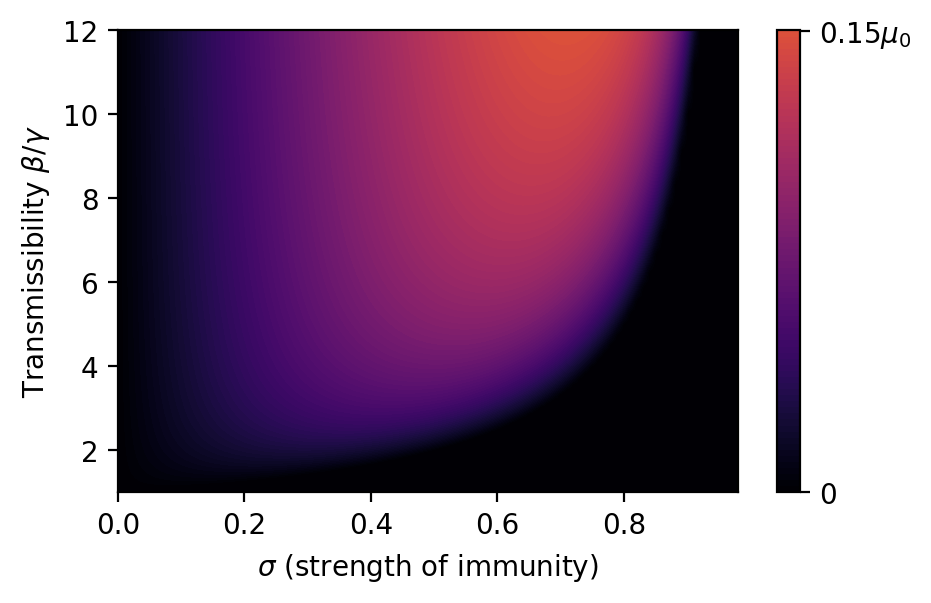

In [10]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)
from scipy.interpolate import griddata
R0s = bs_out * 2
# Create grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured data
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, fiducially.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu_0$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
#plt.title('Net adaptation rate (leaky immunity)')
plt.show()

In [11]:
# Fig 3C

In [12]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)
i=0
for s in sigmas:
    for b in betas:
        em_rates.append(get_em_rate_at_equi_fig3(beta=b, sigma=s, mu=0.3, sigma21=0.0))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 27324
1 out of 27324
2 out of 27324
3 out of 27324
4 out of 27324
5 out of 27324
6 out of 27324
7 out of 27324
8 out of 27324
9 out of 27324
10 out of 27324
11 out of 27324
12 out of 27324
13 out of 27324
14 out of 27324
15 out of 27324
16 out of 27324
17 out of 27324
18 out of 27324
19 out of 27324
20 out of 27324
21 out of 27324
22 out of 27324
23 out of 27324
24 out of 27324
25 out of 27324
26 out of 27324
27 out of 27324
28 out of 27324
29 out of 27324
30 out of 27324
31 out of 27324
32 out of 27324
33 out of 27324
34 out of 27324
35 out of 27324
36 out of 27324
37 out of 27324
38 out of 27324
39 out of 27324
40 out of 27324
41 out of 27324
42 out of 27324
43 out of 27324
44 out of 27324
45 out of 27324
46 out of 27324
47 out of 27324
48 out of 27324
49 out of 27324
50 out of 27324
51 out of 27324
52 out of 27324
53 out of 27324
54 out of 27324
55 out of 27324
56 out of 27324
57 out of 27324
58 out of 27324
59 out of 27324
60 out of 27324
61 out of 27324
62 out of 27324
63

1762 out of 27324
1763 out of 27324
1764 out of 27324
1765 out of 27324
1766 out of 27324
1767 out of 27324
1768 out of 27324
1769 out of 27324
1770 out of 27324
1771 out of 27324
1772 out of 27324
1773 out of 27324
1774 out of 27324
1775 out of 27324
1776 out of 27324
1777 out of 27324
1778 out of 27324
1779 out of 27324
1780 out of 27324
1781 out of 27324
1782 out of 27324
1783 out of 27324
1784 out of 27324
1785 out of 27324
1786 out of 27324
1787 out of 27324
1788 out of 27324
1789 out of 27324
1790 out of 27324
1791 out of 27324
1792 out of 27324
1793 out of 27324
1794 out of 27324
1795 out of 27324
1796 out of 27324
1797 out of 27324
1798 out of 27324
1799 out of 27324
1800 out of 27324
1801 out of 27324
1802 out of 27324
1803 out of 27324
1804 out of 27324
1805 out of 27324
1806 out of 27324
1807 out of 27324
1808 out of 27324
1809 out of 27324
1810 out of 27324
1811 out of 27324
1812 out of 27324
1813 out of 27324
1814 out of 27324
1815 out of 27324
1816 out of 27324
1817 out o

2817 out of 27324
2818 out of 27324
2819 out of 27324
2820 out of 27324
2821 out of 27324
2822 out of 27324
2823 out of 27324
2824 out of 27324
2825 out of 27324
2826 out of 27324
2827 out of 27324
2828 out of 27324
2829 out of 27324
2830 out of 27324
2831 out of 27324
2832 out of 27324
2833 out of 27324
2834 out of 27324
2835 out of 27324
2836 out of 27324
2837 out of 27324
2838 out of 27324
2839 out of 27324
2840 out of 27324
2841 out of 27324
2842 out of 27324
2843 out of 27324
2844 out of 27324
2845 out of 27324
2846 out of 27324
2847 out of 27324
2848 out of 27324
2849 out of 27324
2850 out of 27324
2851 out of 27324
2852 out of 27324
2853 out of 27324
2854 out of 27324
2855 out of 27324
2856 out of 27324
2857 out of 27324
2858 out of 27324
2859 out of 27324
2860 out of 27324
2861 out of 27324
2862 out of 27324
2863 out of 27324
2864 out of 27324
2865 out of 27324
2866 out of 27324
2867 out of 27324
2868 out of 27324
2869 out of 27324
2870 out of 27324
2871 out of 27324
2872 out o

3859 out of 27324
3860 out of 27324
3861 out of 27324
3862 out of 27324
3863 out of 27324
3864 out of 27324
3865 out of 27324
3866 out of 27324
3867 out of 27324
3868 out of 27324
3869 out of 27324
3870 out of 27324
3871 out of 27324
3872 out of 27324
3873 out of 27324
3874 out of 27324
3875 out of 27324
3876 out of 27324
3877 out of 27324
3878 out of 27324
3879 out of 27324
3880 out of 27324
3881 out of 27324
3882 out of 27324
3883 out of 27324
3884 out of 27324
3885 out of 27324
3886 out of 27324
3887 out of 27324
3888 out of 27324
3889 out of 27324
3890 out of 27324
3891 out of 27324
3892 out of 27324
3893 out of 27324
3894 out of 27324
3895 out of 27324
3896 out of 27324
3897 out of 27324
3898 out of 27324
3899 out of 27324
3900 out of 27324
3901 out of 27324
3902 out of 27324
3903 out of 27324
3904 out of 27324
3905 out of 27324
3906 out of 27324
3907 out of 27324
3908 out of 27324
3909 out of 27324
3910 out of 27324
3911 out of 27324
3912 out of 27324
3913 out of 27324
3914 out o

4889 out of 27324
4890 out of 27324
4891 out of 27324
4892 out of 27324
4893 out of 27324
4894 out of 27324
4895 out of 27324
4896 out of 27324
4897 out of 27324
4898 out of 27324
4899 out of 27324
4900 out of 27324
4901 out of 27324
4902 out of 27324
4903 out of 27324
4904 out of 27324
4905 out of 27324
4906 out of 27324
4907 out of 27324
4908 out of 27324
4909 out of 27324
4910 out of 27324
4911 out of 27324
4912 out of 27324
4913 out of 27324
4914 out of 27324
4915 out of 27324
4916 out of 27324
4917 out of 27324
4918 out of 27324
4919 out of 27324
4920 out of 27324
4921 out of 27324
4922 out of 27324
4923 out of 27324
4924 out of 27324
4925 out of 27324
4926 out of 27324
4927 out of 27324
4928 out of 27324
4929 out of 27324
4930 out of 27324
4931 out of 27324
4932 out of 27324
4933 out of 27324
4934 out of 27324
4935 out of 27324
4936 out of 27324
4937 out of 27324
4938 out of 27324
4939 out of 27324
4940 out of 27324
4941 out of 27324
4942 out of 27324
4943 out of 27324
4944 out o

5918 out of 27324
5919 out of 27324
5920 out of 27324
5921 out of 27324
5922 out of 27324
5923 out of 27324
5924 out of 27324
5925 out of 27324
5926 out of 27324
5927 out of 27324
5928 out of 27324
5929 out of 27324
5930 out of 27324
5931 out of 27324
5932 out of 27324
5933 out of 27324
5934 out of 27324
5935 out of 27324
5936 out of 27324
5937 out of 27324
5938 out of 27324
5939 out of 27324
5940 out of 27324
5941 out of 27324
5942 out of 27324
5943 out of 27324
5944 out of 27324
5945 out of 27324
5946 out of 27324
5947 out of 27324
5948 out of 27324
5949 out of 27324
5950 out of 27324
5951 out of 27324
5952 out of 27324
5953 out of 27324
5954 out of 27324
5955 out of 27324
5956 out of 27324
5957 out of 27324
5958 out of 27324
5959 out of 27324
5960 out of 27324
5961 out of 27324
5962 out of 27324
5963 out of 27324
5964 out of 27324
5965 out of 27324
5966 out of 27324
5967 out of 27324
5968 out of 27324
5969 out of 27324
5970 out of 27324
5971 out of 27324
5972 out of 27324
5973 out o

6953 out of 27324
6954 out of 27324
6955 out of 27324
6956 out of 27324
6957 out of 27324
6958 out of 27324
6959 out of 27324
6960 out of 27324
6961 out of 27324
6962 out of 27324
6963 out of 27324
6964 out of 27324
6965 out of 27324
6966 out of 27324
6967 out of 27324
6968 out of 27324
6969 out of 27324
6970 out of 27324
6971 out of 27324
6972 out of 27324
6973 out of 27324
6974 out of 27324
6975 out of 27324
6976 out of 27324
6977 out of 27324
6978 out of 27324
6979 out of 27324
6980 out of 27324
6981 out of 27324
6982 out of 27324
6983 out of 27324
6984 out of 27324
6985 out of 27324
6986 out of 27324
6987 out of 27324
6988 out of 27324
6989 out of 27324
6990 out of 27324
6991 out of 27324
6992 out of 27324
6993 out of 27324
6994 out of 27324
6995 out of 27324
6996 out of 27324
6997 out of 27324
6998 out of 27324
6999 out of 27324
7000 out of 27324
7001 out of 27324
7002 out of 27324
7003 out of 27324
7004 out of 27324
7005 out of 27324
7006 out of 27324
7007 out of 27324
7008 out o

7991 out of 27324
7992 out of 27324
7993 out of 27324
7994 out of 27324
7995 out of 27324
7996 out of 27324
7997 out of 27324
7998 out of 27324
7999 out of 27324
8000 out of 27324
8001 out of 27324
8002 out of 27324
8003 out of 27324
8004 out of 27324
8005 out of 27324
8006 out of 27324
8007 out of 27324
8008 out of 27324
8009 out of 27324
8010 out of 27324
8011 out of 27324
8012 out of 27324
8013 out of 27324
8014 out of 27324
8015 out of 27324
8016 out of 27324
8017 out of 27324
8018 out of 27324
8019 out of 27324
8020 out of 27324
8021 out of 27324
8022 out of 27324
8023 out of 27324
8024 out of 27324
8025 out of 27324
8026 out of 27324
8027 out of 27324
8028 out of 27324
8029 out of 27324
8030 out of 27324
8031 out of 27324
8032 out of 27324
8033 out of 27324
8034 out of 27324
8035 out of 27324
8036 out of 27324
8037 out of 27324
8038 out of 27324
8039 out of 27324
8040 out of 27324
8041 out of 27324
8042 out of 27324
8043 out of 27324
8044 out of 27324
8045 out of 27324
8046 out o

9031 out of 27324
9032 out of 27324
9033 out of 27324
9034 out of 27324
9035 out of 27324
9036 out of 27324
9037 out of 27324
9038 out of 27324
9039 out of 27324
9040 out of 27324
9041 out of 27324
9042 out of 27324
9043 out of 27324
9044 out of 27324
9045 out of 27324
9046 out of 27324
9047 out of 27324
9048 out of 27324
9049 out of 27324
9050 out of 27324
9051 out of 27324
9052 out of 27324
9053 out of 27324
9054 out of 27324
9055 out of 27324
9056 out of 27324
9057 out of 27324
9058 out of 27324
9059 out of 27324
9060 out of 27324
9061 out of 27324
9062 out of 27324
9063 out of 27324
9064 out of 27324
9065 out of 27324
9066 out of 27324
9067 out of 27324
9068 out of 27324
9069 out of 27324
9070 out of 27324
9071 out of 27324
9072 out of 27324
9073 out of 27324
9074 out of 27324
9075 out of 27324
9076 out of 27324
9077 out of 27324
9078 out of 27324
9079 out of 27324
9080 out of 27324
9081 out of 27324
9082 out of 27324
9083 out of 27324
9084 out of 27324
9085 out of 27324
9086 out o

10079 out of 27324
10080 out of 27324
10081 out of 27324
10082 out of 27324
10083 out of 27324
10084 out of 27324
10085 out of 27324
10086 out of 27324
10087 out of 27324
10088 out of 27324
10089 out of 27324
10090 out of 27324
10091 out of 27324
10092 out of 27324
10093 out of 27324
10094 out of 27324
10095 out of 27324
10096 out of 27324
10097 out of 27324
10098 out of 27324
10099 out of 27324
10100 out of 27324
10101 out of 27324
10102 out of 27324
10103 out of 27324
10104 out of 27324
10105 out of 27324
10106 out of 27324
10107 out of 27324
10108 out of 27324
10109 out of 27324
10110 out of 27324
10111 out of 27324
10112 out of 27324
10113 out of 27324
10114 out of 27324
10115 out of 27324
10116 out of 27324
10117 out of 27324
10118 out of 27324
10119 out of 27324
10120 out of 27324
10121 out of 27324
10122 out of 27324
10123 out of 27324
10124 out of 27324
10125 out of 27324
10126 out of 27324
10127 out of 27324
10128 out of 27324
10129 out of 27324
10130 out of 27324
10131 out of

11133 out of 27324
11134 out of 27324
11135 out of 27324
11136 out of 27324
11137 out of 27324
11138 out of 27324
11139 out of 27324
11140 out of 27324
11141 out of 27324
11142 out of 27324
11143 out of 27324
11144 out of 27324
11145 out of 27324
11146 out of 27324
11147 out of 27324
11148 out of 27324
11149 out of 27324
11150 out of 27324
11151 out of 27324
11152 out of 27324
11153 out of 27324
11154 out of 27324
11155 out of 27324
11156 out of 27324
11157 out of 27324
11158 out of 27324
11159 out of 27324
11160 out of 27324
11161 out of 27324
11162 out of 27324
11163 out of 27324
11164 out of 27324
11165 out of 27324
11166 out of 27324
11167 out of 27324
11168 out of 27324
11169 out of 27324
11170 out of 27324
11171 out of 27324
11172 out of 27324
11173 out of 27324
11174 out of 27324
11175 out of 27324
11176 out of 27324
11177 out of 27324
11178 out of 27324
11179 out of 27324
11180 out of 27324
11181 out of 27324
11182 out of 27324
11183 out of 27324
11184 out of 27324
11185 out of

12173 out of 27324
12174 out of 27324
12175 out of 27324
12176 out of 27324
12177 out of 27324
12178 out of 27324
12179 out of 27324
12180 out of 27324
12181 out of 27324
12182 out of 27324
12183 out of 27324
12184 out of 27324
12185 out of 27324
12186 out of 27324
12187 out of 27324
12188 out of 27324
12189 out of 27324
12190 out of 27324
12191 out of 27324
12192 out of 27324
12193 out of 27324
12194 out of 27324
12195 out of 27324
12196 out of 27324
12197 out of 27324
12198 out of 27324
12199 out of 27324
12200 out of 27324
12201 out of 27324
12202 out of 27324
12203 out of 27324
12204 out of 27324
12205 out of 27324
12206 out of 27324
12207 out of 27324
12208 out of 27324
12209 out of 27324
12210 out of 27324
12211 out of 27324
12212 out of 27324
12213 out of 27324
12214 out of 27324
12215 out of 27324
12216 out of 27324
12217 out of 27324
12218 out of 27324
12219 out of 27324
12220 out of 27324
12221 out of 27324
12222 out of 27324
12223 out of 27324
12224 out of 27324
12225 out of

13220 out of 27324
13221 out of 27324
13222 out of 27324
13223 out of 27324
13224 out of 27324
13225 out of 27324
13226 out of 27324
13227 out of 27324
13228 out of 27324
13229 out of 27324
13230 out of 27324
13231 out of 27324
13232 out of 27324
13233 out of 27324
13234 out of 27324
13235 out of 27324
13236 out of 27324
13237 out of 27324
13238 out of 27324
13239 out of 27324
13240 out of 27324
13241 out of 27324
13242 out of 27324
13243 out of 27324
13244 out of 27324
13245 out of 27324
13246 out of 27324
13247 out of 27324
13248 out of 27324
13249 out of 27324
13250 out of 27324
13251 out of 27324
13252 out of 27324
13253 out of 27324
13254 out of 27324
13255 out of 27324
13256 out of 27324
13257 out of 27324
13258 out of 27324
13259 out of 27324
13260 out of 27324
13261 out of 27324
13262 out of 27324
13263 out of 27324
13264 out of 27324
13265 out of 27324
13266 out of 27324
13267 out of 27324
13268 out of 27324
13269 out of 27324
13270 out of 27324
13271 out of 27324
13272 out of

14264 out of 27324
14265 out of 27324
14266 out of 27324
14267 out of 27324
14268 out of 27324
14269 out of 27324
14270 out of 27324
14271 out of 27324
14272 out of 27324
14273 out of 27324
14274 out of 27324
14275 out of 27324
14276 out of 27324
14277 out of 27324
14278 out of 27324
14279 out of 27324
14280 out of 27324
14281 out of 27324
14282 out of 27324
14283 out of 27324
14284 out of 27324
14285 out of 27324
14286 out of 27324
14287 out of 27324
14288 out of 27324
14289 out of 27324
14290 out of 27324
14291 out of 27324
14292 out of 27324
14293 out of 27324
14294 out of 27324
14295 out of 27324
14296 out of 27324
14297 out of 27324
14298 out of 27324
14299 out of 27324
14300 out of 27324
14301 out of 27324
14302 out of 27324
14303 out of 27324
14304 out of 27324
14305 out of 27324
14306 out of 27324
14307 out of 27324
14308 out of 27324
14309 out of 27324
14310 out of 27324
14311 out of 27324
14312 out of 27324
14313 out of 27324
14314 out of 27324
14315 out of 27324
14316 out of

15308 out of 27324
15309 out of 27324
15310 out of 27324
15311 out of 27324
15312 out of 27324
15313 out of 27324
15314 out of 27324
15315 out of 27324
15316 out of 27324
15317 out of 27324
15318 out of 27324
15319 out of 27324
15320 out of 27324
15321 out of 27324
15322 out of 27324
15323 out of 27324
15324 out of 27324
15325 out of 27324
15326 out of 27324
15327 out of 27324
15328 out of 27324
15329 out of 27324
15330 out of 27324
15331 out of 27324
15332 out of 27324
15333 out of 27324
15334 out of 27324
15335 out of 27324
15336 out of 27324
15337 out of 27324
15338 out of 27324
15339 out of 27324
15340 out of 27324
15341 out of 27324
15342 out of 27324
15343 out of 27324
15344 out of 27324
15345 out of 27324
15346 out of 27324
15347 out of 27324
15348 out of 27324
15349 out of 27324
15350 out of 27324
15351 out of 27324
15352 out of 27324
15353 out of 27324
15354 out of 27324
15355 out of 27324
15356 out of 27324
15357 out of 27324
15358 out of 27324
15359 out of 27324
15360 out of

16620 out of 27324
16621 out of 27324
16622 out of 27324
16623 out of 27324
16624 out of 27324
16625 out of 27324
16626 out of 27324
16627 out of 27324
16628 out of 27324
16629 out of 27324
16630 out of 27324
16631 out of 27324
16632 out of 27324
16633 out of 27324
16634 out of 27324
16635 out of 27324
16636 out of 27324
16637 out of 27324
16638 out of 27324
16639 out of 27324
16640 out of 27324
16641 out of 27324
16642 out of 27324
16643 out of 27324
16644 out of 27324
16645 out of 27324
16646 out of 27324
16647 out of 27324
16648 out of 27324
16649 out of 27324
16650 out of 27324
16651 out of 27324
16652 out of 27324
16653 out of 27324
16654 out of 27324
16655 out of 27324
16656 out of 27324
16657 out of 27324
16658 out of 27324
16659 out of 27324
16660 out of 27324
16661 out of 27324
16662 out of 27324
16663 out of 27324
16664 out of 27324
16665 out of 27324
16666 out of 27324
16667 out of 27324
16668 out of 27324
16669 out of 27324
16670 out of 27324
16671 out of 27324
16672 out of

17846 out of 27324
17847 out of 27324
17848 out of 27324
17849 out of 27324
17850 out of 27324
17851 out of 27324
17852 out of 27324
17853 out of 27324
17854 out of 27324
17855 out of 27324
17856 out of 27324
17857 out of 27324
17858 out of 27324
17859 out of 27324
17860 out of 27324
17861 out of 27324
17862 out of 27324
17863 out of 27324
17864 out of 27324
17865 out of 27324
17866 out of 27324
17867 out of 27324
17868 out of 27324
17869 out of 27324
17870 out of 27324
17871 out of 27324
17872 out of 27324
17873 out of 27324
17874 out of 27324
17875 out of 27324
17876 out of 27324
17877 out of 27324
17878 out of 27324
17879 out of 27324
17880 out of 27324
17881 out of 27324
17882 out of 27324
17883 out of 27324
17884 out of 27324
17885 out of 27324
17886 out of 27324
17887 out of 27324
17888 out of 27324
17889 out of 27324
17890 out of 27324
17891 out of 27324
17892 out of 27324
17893 out of 27324
17894 out of 27324
17895 out of 27324
17896 out of 27324
17897 out of 27324
17898 out of

18886 out of 27324
18887 out of 27324
18888 out of 27324
18889 out of 27324
18890 out of 27324
18891 out of 27324
18892 out of 27324
18893 out of 27324
18894 out of 27324
18895 out of 27324
18896 out of 27324
18897 out of 27324
18898 out of 27324
18899 out of 27324
18900 out of 27324
18901 out of 27324
18902 out of 27324
18903 out of 27324
18904 out of 27324
18905 out of 27324
18906 out of 27324
18907 out of 27324
18908 out of 27324
18909 out of 27324
18910 out of 27324
18911 out of 27324
18912 out of 27324
18913 out of 27324
18914 out of 27324
18915 out of 27324
18916 out of 27324
18917 out of 27324
18918 out of 27324
18919 out of 27324
18920 out of 27324
18921 out of 27324
18922 out of 27324
18923 out of 27324
18924 out of 27324
18925 out of 27324
18926 out of 27324
18927 out of 27324
18928 out of 27324
18929 out of 27324
18930 out of 27324
18931 out of 27324
18932 out of 27324
18933 out of 27324
18934 out of 27324
18935 out of 27324
18936 out of 27324
18937 out of 27324
18938 out of

19935 out of 27324
19936 out of 27324
19937 out of 27324
19938 out of 27324
19939 out of 27324
19940 out of 27324
19941 out of 27324
19942 out of 27324
19943 out of 27324
19944 out of 27324
19945 out of 27324
19946 out of 27324
19947 out of 27324
19948 out of 27324
19949 out of 27324
19950 out of 27324
19951 out of 27324
19952 out of 27324
19953 out of 27324
19954 out of 27324
19955 out of 27324
19956 out of 27324
19957 out of 27324
19958 out of 27324
19959 out of 27324
19960 out of 27324
19961 out of 27324
19962 out of 27324
19963 out of 27324
19964 out of 27324
19965 out of 27324
19966 out of 27324
19967 out of 27324
19968 out of 27324
19969 out of 27324
19970 out of 27324
19971 out of 27324
19972 out of 27324
19973 out of 27324
19974 out of 27324
19975 out of 27324
19976 out of 27324
19977 out of 27324
19978 out of 27324
19979 out of 27324
19980 out of 27324
19981 out of 27324
19982 out of 27324
19983 out of 27324
19984 out of 27324
19985 out of 27324
19986 out of 27324
19987 out of

20983 out of 27324
20984 out of 27324
20985 out of 27324
20986 out of 27324
20987 out of 27324
20988 out of 27324
20989 out of 27324
20990 out of 27324
20991 out of 27324
20992 out of 27324
20993 out of 27324
20994 out of 27324
20995 out of 27324
20996 out of 27324
20997 out of 27324
20998 out of 27324
20999 out of 27324
21000 out of 27324
21001 out of 27324
21002 out of 27324
21003 out of 27324
21004 out of 27324
21005 out of 27324
21006 out of 27324
21007 out of 27324
21008 out of 27324
21009 out of 27324
21010 out of 27324
21011 out of 27324
21012 out of 27324
21013 out of 27324
21014 out of 27324
21015 out of 27324
21016 out of 27324
21017 out of 27324
21018 out of 27324
21019 out of 27324
21020 out of 27324
21021 out of 27324
21022 out of 27324
21023 out of 27324
21024 out of 27324
21025 out of 27324
21026 out of 27324
21027 out of 27324
21028 out of 27324
21029 out of 27324
21030 out of 27324
21031 out of 27324
21032 out of 27324
21033 out of 27324
21034 out of 27324
21035 out of

22009 out of 27324
22010 out of 27324
22011 out of 27324
22012 out of 27324
22013 out of 27324
22014 out of 27324
22015 out of 27324
22016 out of 27324
22017 out of 27324
22018 out of 27324
22019 out of 27324
22020 out of 27324
22021 out of 27324
22022 out of 27324
22023 out of 27324
22024 out of 27324
22025 out of 27324
22026 out of 27324
22027 out of 27324
22028 out of 27324
22029 out of 27324
22030 out of 27324
22031 out of 27324
22032 out of 27324
22033 out of 27324
22034 out of 27324
22035 out of 27324
22036 out of 27324
22037 out of 27324
22038 out of 27324
22039 out of 27324
22040 out of 27324
22041 out of 27324
22042 out of 27324
22043 out of 27324
22044 out of 27324
22045 out of 27324
22046 out of 27324
22047 out of 27324
22048 out of 27324
22049 out of 27324
22050 out of 27324
22051 out of 27324
22052 out of 27324
22053 out of 27324
22054 out of 27324
22055 out of 27324
22056 out of 27324
22057 out of 27324
22058 out of 27324
22059 out of 27324
22060 out of 27324
22061 out of

23048 out of 27324
23049 out of 27324
23050 out of 27324
23051 out of 27324
23052 out of 27324
23053 out of 27324
23054 out of 27324
23055 out of 27324
23056 out of 27324
23057 out of 27324
23058 out of 27324
23059 out of 27324
23060 out of 27324
23061 out of 27324
23062 out of 27324
23063 out of 27324
23064 out of 27324
23065 out of 27324
23066 out of 27324
23067 out of 27324
23068 out of 27324
23069 out of 27324
23070 out of 27324
23071 out of 27324
23072 out of 27324
23073 out of 27324
23074 out of 27324
23075 out of 27324
23076 out of 27324
23077 out of 27324
23078 out of 27324
23079 out of 27324
23080 out of 27324
23081 out of 27324
23082 out of 27324
23083 out of 27324
23084 out of 27324
23085 out of 27324
23086 out of 27324
23087 out of 27324
23088 out of 27324
23089 out of 27324
23090 out of 27324
23091 out of 27324
23092 out of 27324
23093 out of 27324
23094 out of 27324
23095 out of 27324
23096 out of 27324
23097 out of 27324
23098 out of 27324
23099 out of 27324
23100 out of

24094 out of 27324
24095 out of 27324
24096 out of 27324
24097 out of 27324
24098 out of 27324
24099 out of 27324
24100 out of 27324
24101 out of 27324
24102 out of 27324
24103 out of 27324
24104 out of 27324
24105 out of 27324
24106 out of 27324
24107 out of 27324
24108 out of 27324
24109 out of 27324
24110 out of 27324
24111 out of 27324
24112 out of 27324
24113 out of 27324
24114 out of 27324
24115 out of 27324
24116 out of 27324
24117 out of 27324
24118 out of 27324
24119 out of 27324
24120 out of 27324
24121 out of 27324
24122 out of 27324
24123 out of 27324
24124 out of 27324
24125 out of 27324
24126 out of 27324
24127 out of 27324
24128 out of 27324
24129 out of 27324
24130 out of 27324
24131 out of 27324
24132 out of 27324
24133 out of 27324
24134 out of 27324
24135 out of 27324
24136 out of 27324
24137 out of 27324
24138 out of 27324
24139 out of 27324
24140 out of 27324
24141 out of 27324
24142 out of 27324
24143 out of 27324
24144 out of 27324
24145 out of 27324
24146 out of

25136 out of 27324
25137 out of 27324
25138 out of 27324
25139 out of 27324
25140 out of 27324
25141 out of 27324
25142 out of 27324
25143 out of 27324
25144 out of 27324
25145 out of 27324
25146 out of 27324
25147 out of 27324
25148 out of 27324
25149 out of 27324
25150 out of 27324
25151 out of 27324
25152 out of 27324
25153 out of 27324
25154 out of 27324
25155 out of 27324
25156 out of 27324
25157 out of 27324
25158 out of 27324
25159 out of 27324
25160 out of 27324
25161 out of 27324
25162 out of 27324
25163 out of 27324
25164 out of 27324
25165 out of 27324
25166 out of 27324
25167 out of 27324
25168 out of 27324
25169 out of 27324
25170 out of 27324
25171 out of 27324
25172 out of 27324
25173 out of 27324
25174 out of 27324
25175 out of 27324
25176 out of 27324
25177 out of 27324
25178 out of 27324
25179 out of 27324
25180 out of 27324
25181 out of 27324
25182 out of 27324
25183 out of 27324
25184 out of 27324
25185 out of 27324
25186 out of 27324
25187 out of 27324
25188 out of

26186 out of 27324
26187 out of 27324
26188 out of 27324
26189 out of 27324
26190 out of 27324
26191 out of 27324
26192 out of 27324
26193 out of 27324
26194 out of 27324
26195 out of 27324
26196 out of 27324
26197 out of 27324
26198 out of 27324
26199 out of 27324
26200 out of 27324
26201 out of 27324
26202 out of 27324
26203 out of 27324
26204 out of 27324
26205 out of 27324
26206 out of 27324
26207 out of 27324
26208 out of 27324
26209 out of 27324
26210 out of 27324
26211 out of 27324
26212 out of 27324
26213 out of 27324
26214 out of 27324
26215 out of 27324
26216 out of 27324
26217 out of 27324
26218 out of 27324
26219 out of 27324
26220 out of 27324
26221 out of 27324
26222 out of 27324
26223 out of 27324
26224 out of 27324
26225 out of 27324
26226 out of 27324
26227 out of 27324
26228 out of 27324
26229 out of 27324
26230 out of 27324
26231 out of 27324
26232 out of 27324
26233 out of 27324
26234 out of 27324
26235 out of 27324
26236 out of 27324
26237 out of 27324
26238 out of

27198 out of 27324
27199 out of 27324
27200 out of 27324
27201 out of 27324
27202 out of 27324
27203 out of 27324
27204 out of 27324
27205 out of 27324
27206 out of 27324
27207 out of 27324
27208 out of 27324
27209 out of 27324
27210 out of 27324
27211 out of 27324
27212 out of 27324
27213 out of 27324
27214 out of 27324
27215 out of 27324
27216 out of 27324
27217 out of 27324
27218 out of 27324
27219 out of 27324
27220 out of 27324
27221 out of 27324
27222 out of 27324
27223 out of 27324
27224 out of 27324
27225 out of 27324
27226 out of 27324
27227 out of 27324
27228 out of 27324
27229 out of 27324
27230 out of 27324
27231 out of 27324
27232 out of 27324
27233 out of 27324
27234 out of 27324
27235 out of 27324
27236 out of 27324
27237 out of 27324
27238 out of 27324
27239 out of 27324
27240 out of 27324
27241 out of 27324
27242 out of 27324
27243 out of 27324
27244 out of 27324
27245 out of 27324
27246 out of 27324
27247 out of 27324
27248 out of 27324
27249 out of 27324
27250 out of

1/T between -3.042548911775515e-17 and 0.07589655172413795


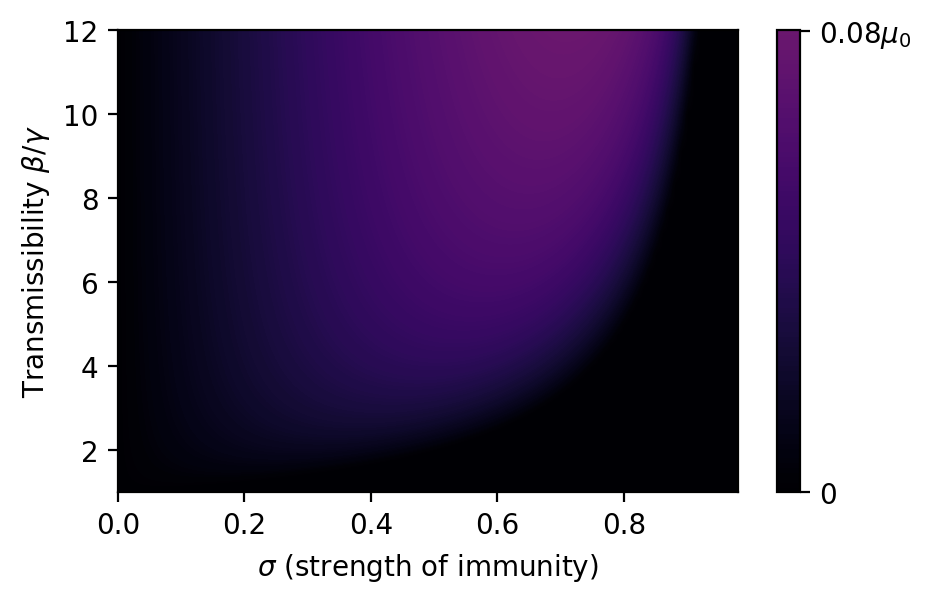

In [13]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)
from scipy.interpolate import griddata
R0s = bs_out * 2
# Create grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured data
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, fiducially.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu_0$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
#plt.title('Net adaptation rate (leaky immunity)')
plt.show()